Supervised Learning Project

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("C:/Users/sridu_000/OneDrive/pgp/Project/sl/bank.csv")
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


# Target variable
     Personal_Loan
 
# Binary category variables
Personal_Loan : Did this customer accept the personal loan offered in the last campaign?
Securities Account : Does the customer have a securities account with the bank?
CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
Online : Does the customer use internet banking facilities?
Credit Card : Does the customer use a credit card issued by UniversalBank?
 
# Independent variables
Age:Age of the customer
Experience:Years of experience of the customer
Income:Annual income in dollars
CCAvg:Average credit card spending
Mortage:Value of House Mortgage

# Ordinal Categorical Variables
Family - Family size of the customer    
Education - education level of the customer

# Nominal variables
ID    
Zip Code

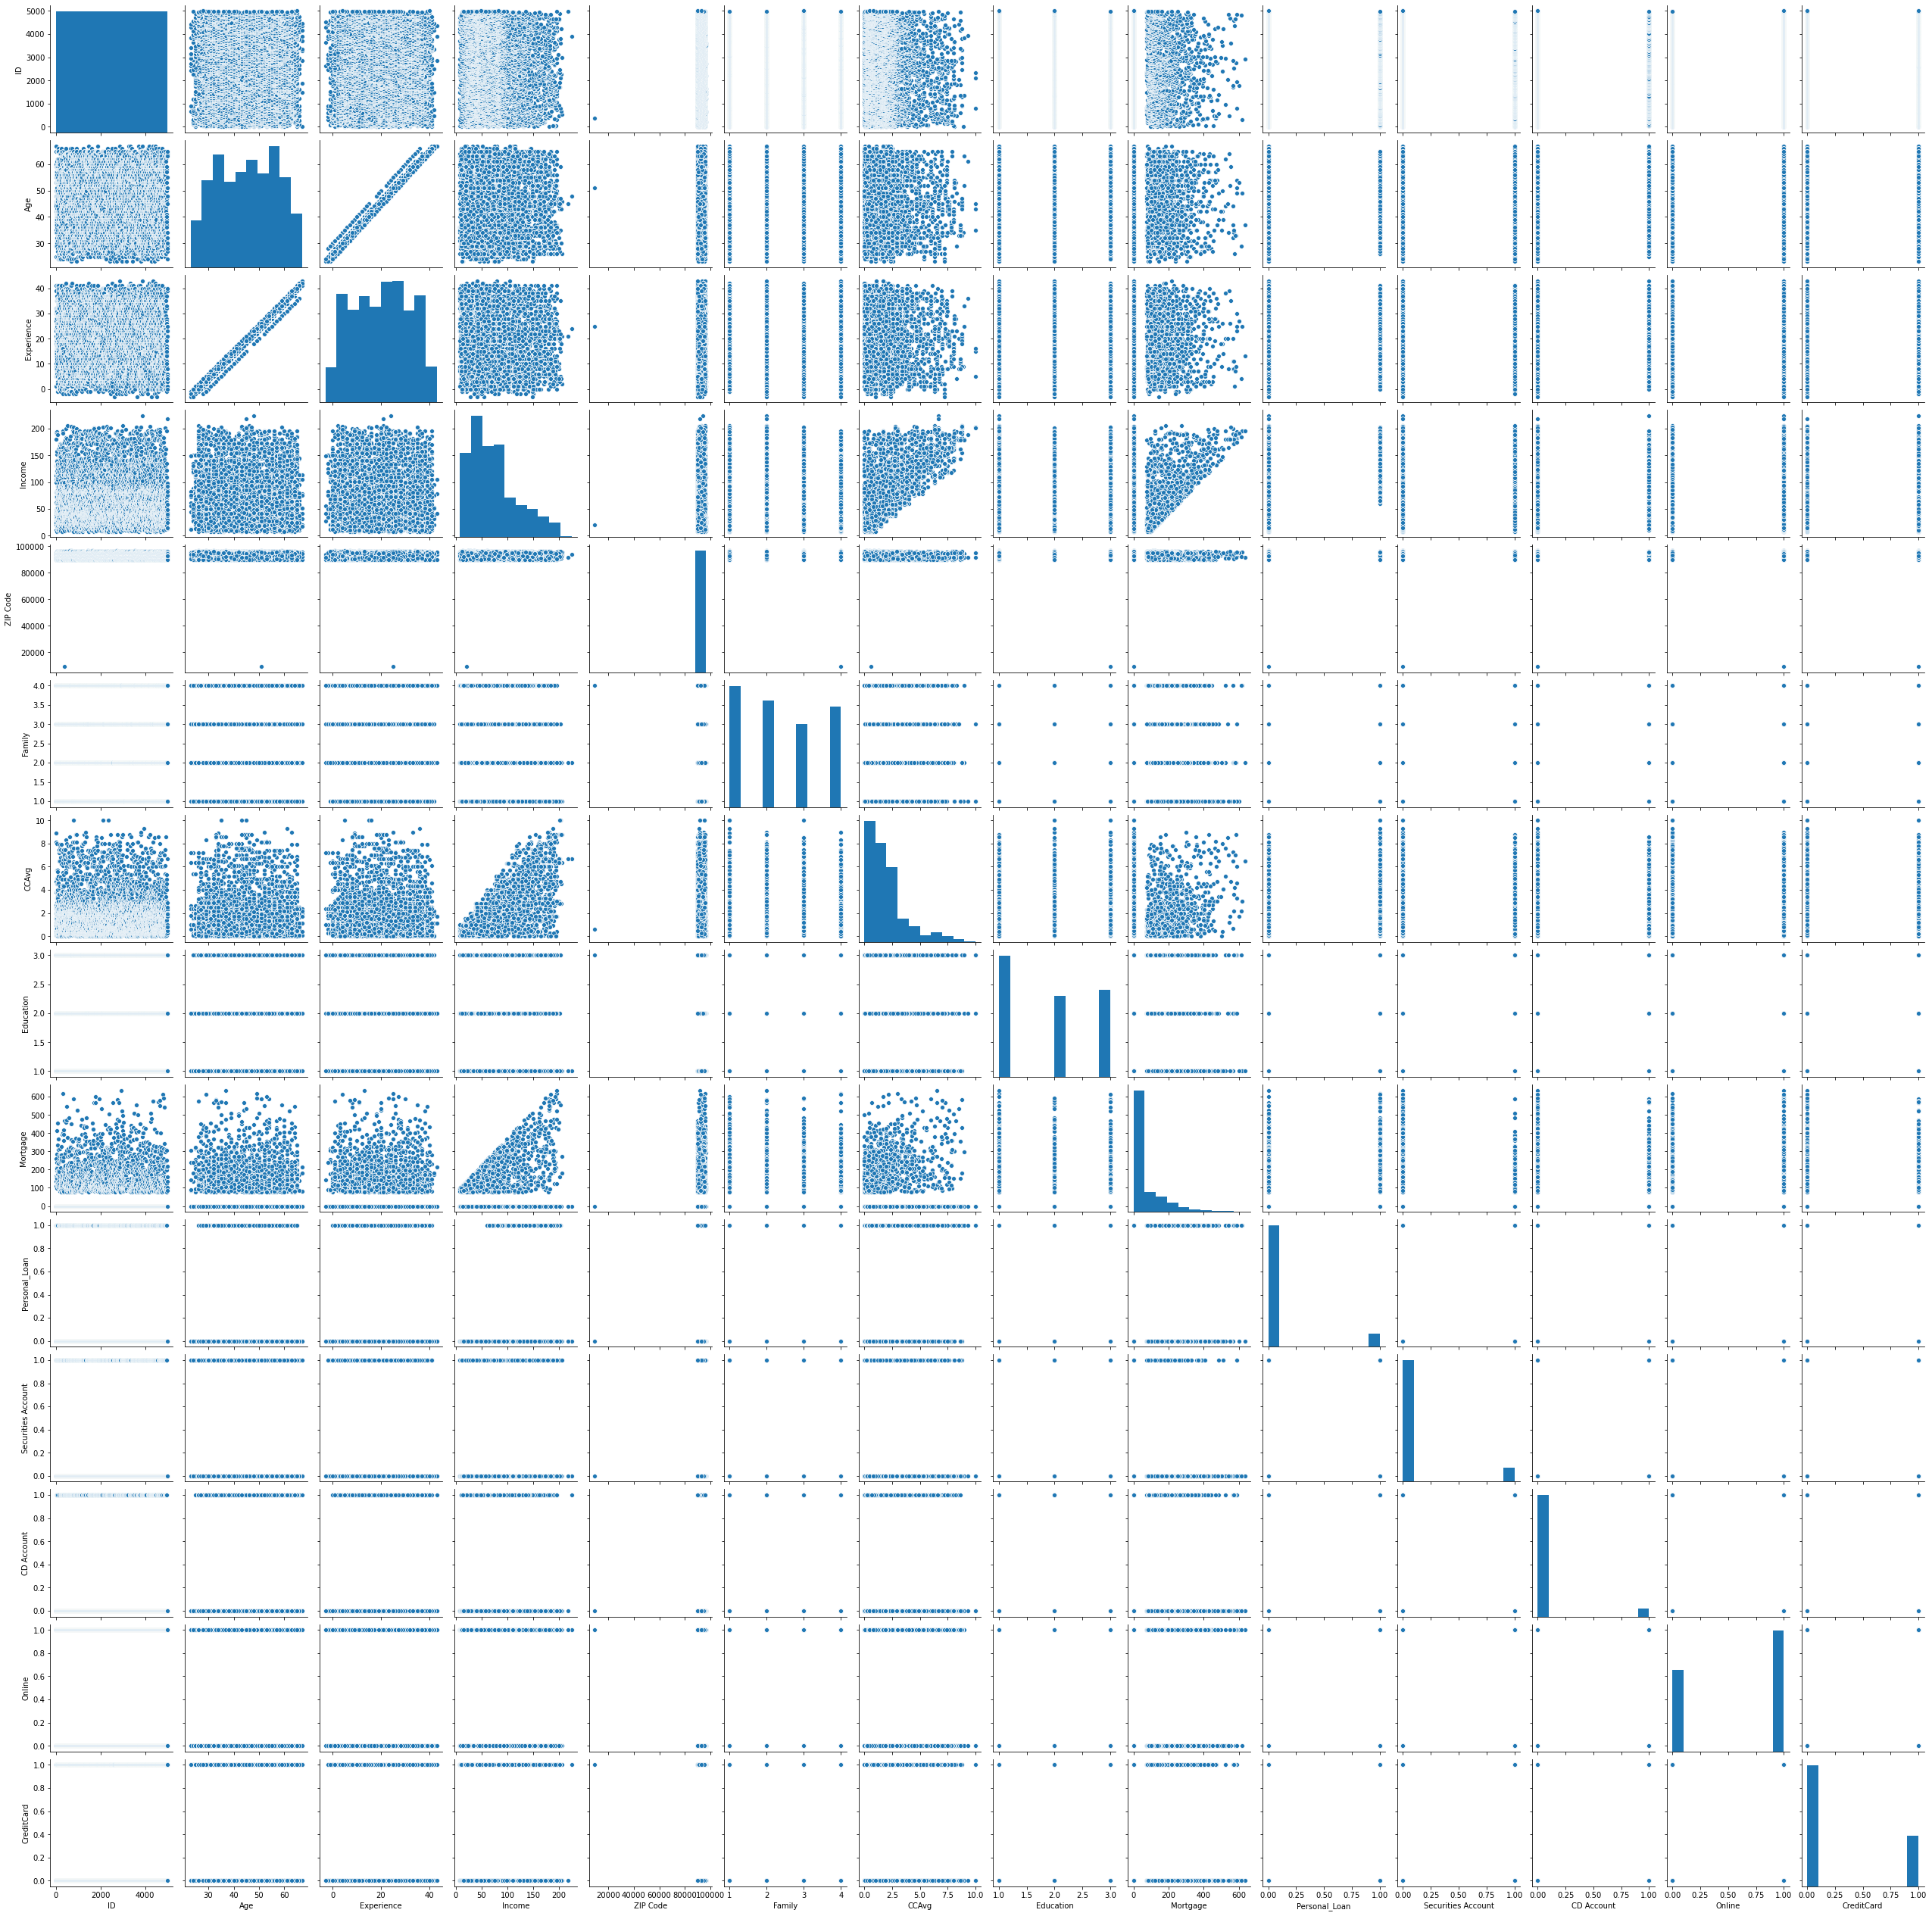

In [3]:
# Study the data distribution in each attribute

sns.pairplot(data);

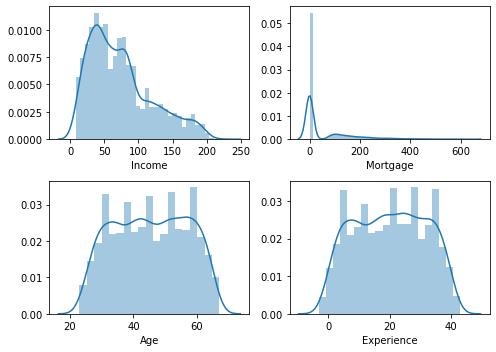

In [4]:
fig, axes = plt.subplots(2,2, figsize=(7,5))
sns.distplot(data['Income'], ax=axes[0,0]);
sns.distplot(data['Mortgage'], ax=axes[0,1]);
sns.distplot(data['Age'], ax=axes[1,0]);
sns.distplot(data['Experience'], ax=axes[1,1]);
fig.tight_layout()

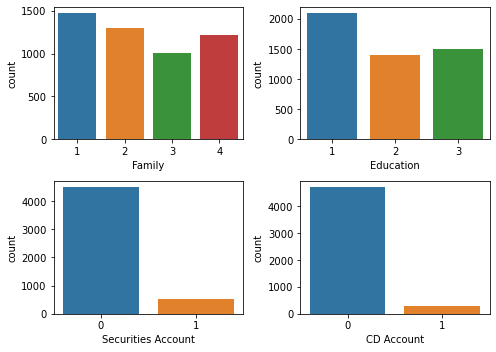

In [5]:
fig, axes = plt.subplots(2,2, figsize=(7,5))
sns.countplot(data['Family'], ax=axes[0,0]);
sns.countplot(data['Education'], ax=axes[0,1]);
sns.countplot(data['Securities Account'], ax=axes[1,0]);
sns.countplot(data['CD Account'], ax=axes[1,1]);
fig.tight_layout()

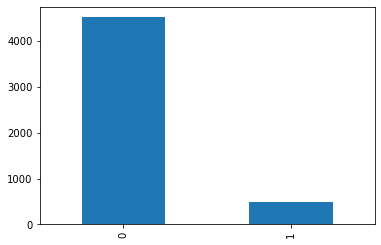

In [6]:
# Get the target column distribution
data.Personal_Loan.value_counts().plot(kind = 'bar')
plt.show() 

In [7]:
# Split the data into training and test set in the ratio of 70:30 respectively

from sklearn.model_selection import train_test_split

Y = data['Personal_Loan']
X = data.drop(['Personal_Loan'], axis=1).copy()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [8]:
# Use different classification models (Logistic, K-NN and Naïve Bayes) to predict the likelihood of a customer buying personal loans
# Logistic model

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver = 'lbfgs', multi_class= 'multinomial')
lr.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

In [9]:
print(f"Accuracy of logistic regression with test data = {lr.score(X_test, y_test)}")
print(f"Accuracy of logistic regression with train data = {lr.score(X_train, y_train)}")

Accuracy of logistic regression with test data = 0.908
Accuracy of logistic regression with train data = 0.9082857142857143


In [10]:
# Naive Bayes model

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [11]:
print(f"Accuracy of logistic regression with test data = {nb.score(X_test, y_test)}")
print(f"Accuracy of logistic regression with train data = {nb.score(X_train, y_train)}")

Accuracy of logistic regression with test data = 0.8826666666666667
Accuracy of logistic regression with train data = 0.8948571428571429


In [12]:
# K-NN model

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# instantiate learning model (k = 1)
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))


# instantiate learning model (k = 5)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

# instantiate learning model (k = 7)
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.872
0.898
0.902
0.9006666666666666


In [13]:
# Print the confusion matrix for all the above models

from sklearn import metrics
print('Confusion_matrix:')
print(metrics.confusion_matrix(y_test, y_pred))

Confusion_matrix:
[[1351    0]
 [ 149    0]]


# Give your reasoning on which is the best model in this case and why it performs better?

The best model in the case of this dataset is Logistic Regression which perfomes better than other given model.
Why this model performes better? Logistic Regression is mostly used for classification problem in which the outcome is binary.
